In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import country_converter as coco
## TSA ##
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter("ignore", category=FutureWarning) 
from math import sqrt
from sklearn.metrics import mean_squared_error

## Classifications
import keras
import missingno as msno

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('./hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Some preprocessing for visualizations

In [3]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                percent_missing
hotel                                  0.000000
total_of_special_requests              0.000000
required_car_parking_spaces            0.000000
adr                                    0.000000
customer_type                          0.000000
days_in_waiting_list                   0.000000
deposit_type                           0.000000
booking_changes                        0.000000
assigned_room_type                     0.000000
reserved_room_type                     0.000000
previous_bookings_not_canceled         0.000000
previous_cancellations                 0.000000
is_repeated_guest                      0.000000
reservation_status                     0.000000
distribution_channel                   0.000000
reservation_status_date                0.000000
meal                                   0.000000
babies                                 0.000000
adults                                 0.000000
stays_in_week_nights                   0

In [4]:
data = data.drop('company',axis = 1) # drop company column
data = data.drop('agent',axis = 1)
data = data.drop('children',axis = 1)
data["country"].fillna("other country", inplace = True)

In [5]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

Where do guests come from ?? where is our target countries ??

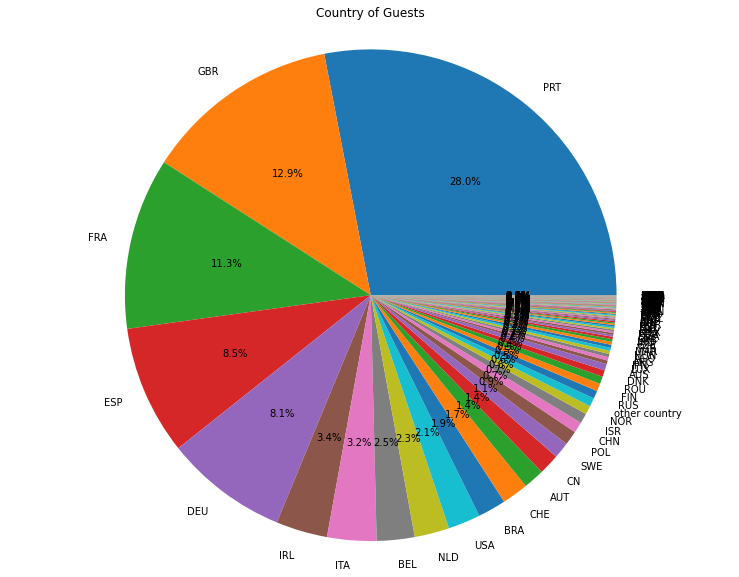

In [6]:
#### Where do guests come from
country = pd.DataFrame(data.loc[data["is_canceled"] == 0]["country"].value_counts())
country.rename(columns={"country": "#reservations"},inplace=True)
# print(country)
totalGuests = sum(data["is_canceled"]==0)
# print(totalGuests)
country["%reservations"] = country["#reservations"]/totalGuests*100
# print(country)
country["country"] = country.index
# print(country)
plt.figure(figsize =(13,10))
plt.pie(country["#reservations"],labels=country["country"],radius=5,autopct='%1.1f%%')
plt.title('Country of Guests')
plt.axis('equal')
plt.show()

As you can see from this chart that most guests are from Europe, now that we know where most of our guests are from we can 
improve our service accordingly

In [8]:
d1 = data
cc = coco.CountryConverter()
continents = []
for index, row in data.iterrows():

    continent = cc.convert([row.country], to='continent')
    continents.append(continent)
cont_df = pd.DataFrame(continents, columns=['continent'])
bookings = pd.concat([data, cont_df], 1)
cont_df.head()

bookings = pd.concat([data, cont_df], 1)

other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other coun

other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other coun

<function matplotlib.pyplot.show(close=None, block=None)>

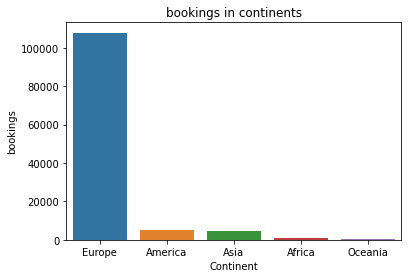

In [9]:
sns.countplot(x='continent', data=bookings,order = bookings['continent'].value_counts().head(5).index)
plt.xlabel("Continent")
plt.ylabel("bookings")
plt.title("bookings in continents")
plt.show

Now we want to see how is the capacity of the hotel in each month ?

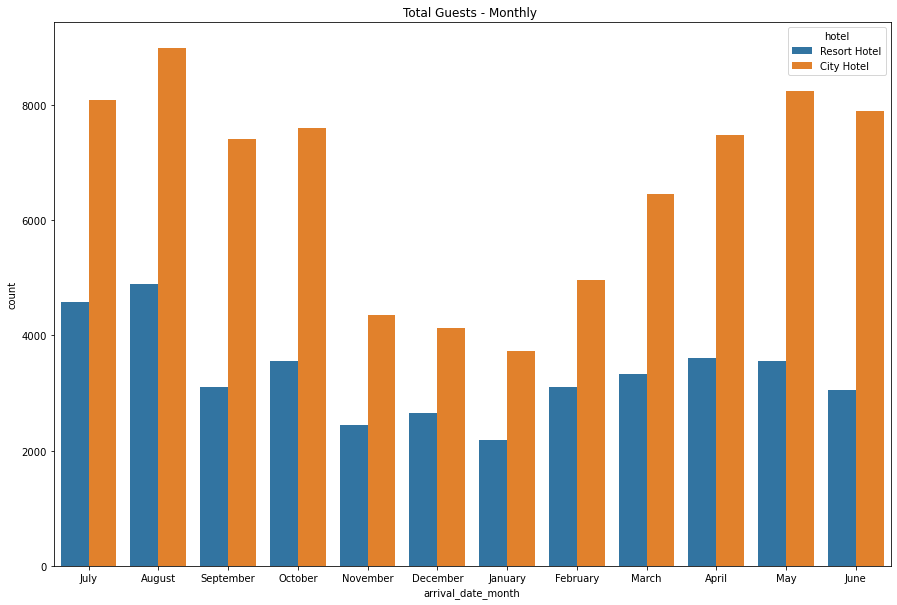

In [10]:
plt.figure(figsize =(15,10))
plt.title("Total Guests - Monthly ")
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

As you can See the least time is November, December, January around the summer is the highest capacity filled. 
maybe there should be more deals on christmas to attract more guests at that time of year.

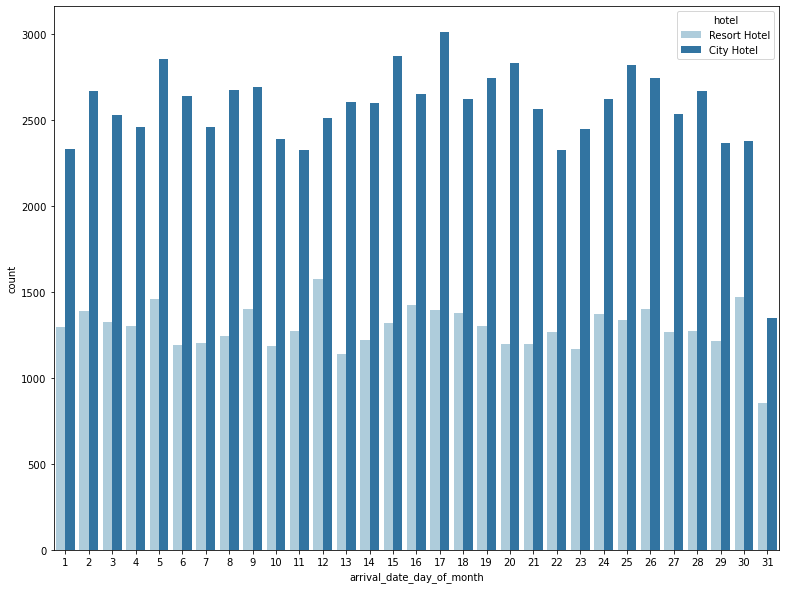

In [11]:
plt.figure(figsize =(13,10))
sns.countplot(data = data, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired',)
plt.show()

<ipython-input-12-3766b23c217d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights


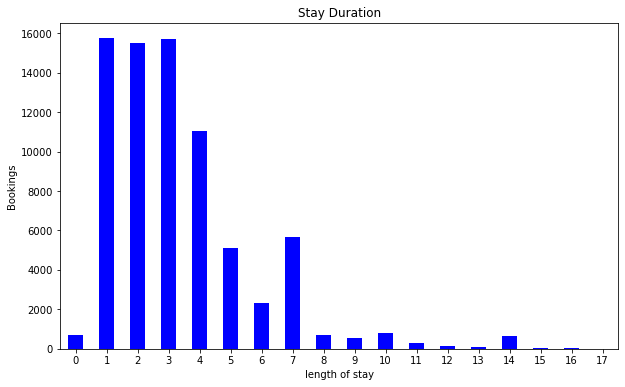

In [12]:
confirmed_bookings = data[data.is_canceled==0]
confirmed_bookings.head()
confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights
length_of_stay = confirmed_bookings.total_span_of_stay.value_counts().sort_index()
length_of_stay.head(18).plot(kind='bar', figsize=(10,6), title = 'length of stay', color='blue')
plt.title('Stay Duration')
plt.xlabel('length of stay')
plt.ylabel('Bookings')
plt.xticks(rotation='horizontal')
plt.show()

We want to know how our guests came here ? how did they know the hotel ?

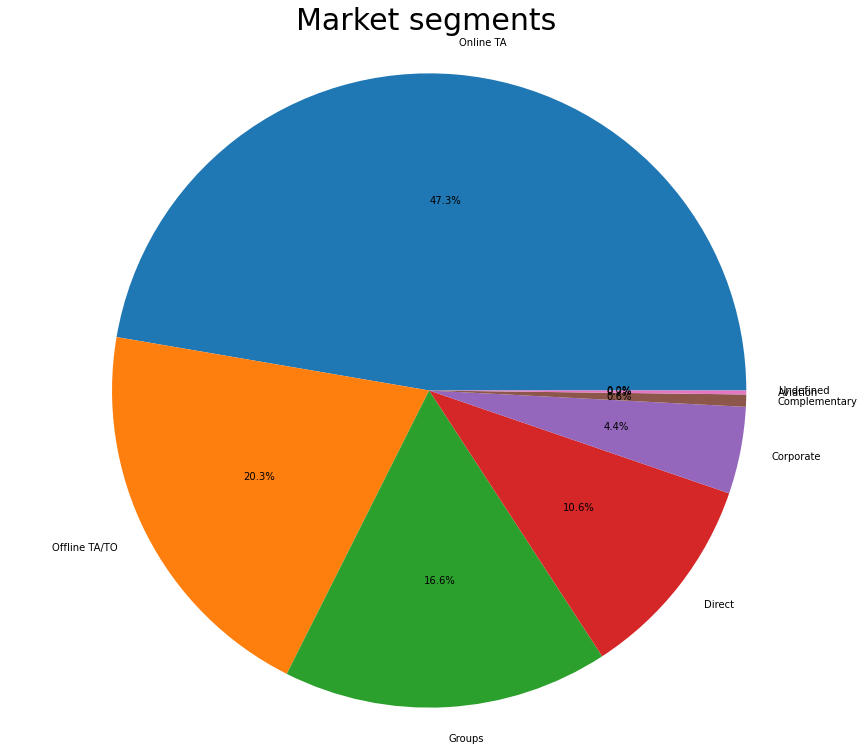

In [13]:
# total bookings per market segment (incl. canceled)
segments=data["market_segment"].value_counts()

# pie plot
plt.figure(figsize =(15,13))
plt.pie(segments.values,labels=segments.index,radius=5,autopct='%1.1f%%')
plt.title('Market segments',size=30)
plt.axis('equal')
plt.show()

as you can see controlling the guests are the travel agents (both online and offline) we need to make a plan to reach out to more guests through online advertisements to attract more groups and direct guests, and also maintain deals with the TAs and TOs (travel agent, tour operator)

Now looking at the cancellations that happened, Was there a deposit ? was it refundable or not ?

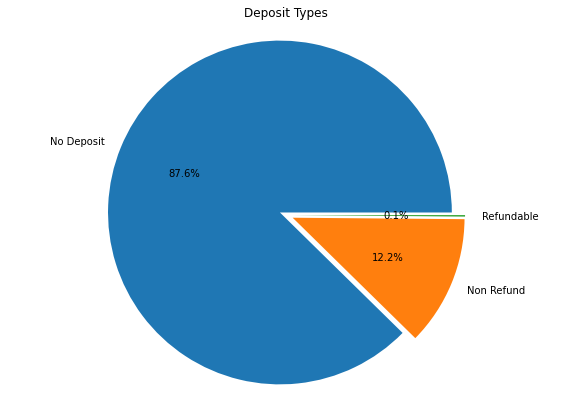

In [14]:
# calculate deposit type instances percentage in data
types=data["deposit_type"].value_counts()
explode = (0.2,0.2,0.2)
# pie plot
plt.figure(figsize =(10,7))
plt.pie(types.values,labels=types.index,radius=5,autopct='%1.1f%%',explode = explode)
plt.title('Deposit Types')
plt.axis('equal')
plt.show()

You can see that for most reservations there wasn't any deposit made, and the refundable deposits took as little as 0.1%

But how does the deposit type affect the cancellation ?

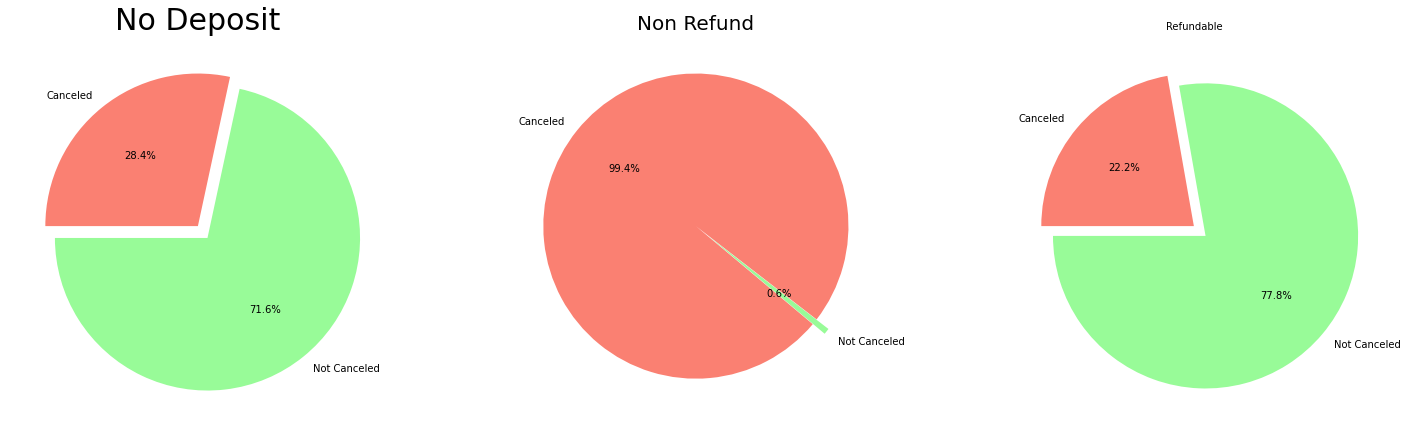

In [15]:
noRefund_notC = (data[data["deposit_type"]=="Non Refund"]["is_canceled"]==0).sum()
noRefund_C = (data[data["deposit_type"]=="Non Refund"]["is_canceled"]==1).sum()
refund_notC = (data[data["deposit_type"]=="Refundable"]["is_canceled"]==0).sum()
refund_C = (data[data["deposit_type"]=="Refundable"]["is_canceled"]==1).sum()
noDeposit_notC = (data[data["deposit_type"]=="No Deposit"]["is_canceled"]==0).sum()
noDeposit_C = (data[data["deposit_type"]=="No Deposit"]["is_canceled"]==1).sum()

df_deposit_type = pd.DataFrame(index=["Not Canceled", "Canceled"])
df_deposit_type["no_deposit"] = [noDeposit_notC, noDeposit_C]
df_deposit_type["non_refund"] = [noRefund_notC, noRefund_C]
df_deposit_type["refundable"] = [refund_notC, refund_C]

# pie plot of cancellations according to deposit type
# cancel_labels = ["cancelled", "not_cancelled"]
fig, dx = plt.subplots(1,3, figsize=(21,6))
explode = (0.1,0.0)

dx[0].pie(df_deposit_type["no_deposit"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode , startangle = 180)
dx[0].set_title("No Deposit",size=30)

dx[1].pie(df_deposit_type["non_refund"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode, startangle = 320)
dx[1].set_title("Non Refund",size=20)

dx[2].pie(df_deposit_type["refundable"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode, startangle = 180)
dx[2].set_title("Refundable",size=10)

plt.tight_layout()
plt.show()

The weirdest part here that almost all reservations with non-refundable deposits were canceled.

<AxesSubplot:xlabel='meal', ylabel='count'>

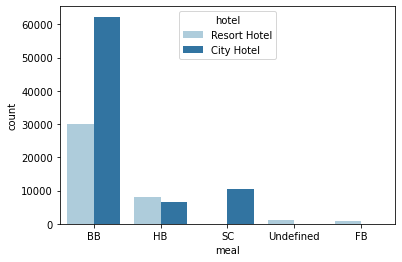

In [16]:
sns.countplot(palette='Paired' ,hue= 'hotel', x='meal', data=data,
              order = data['meal'].value_counts().index)

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

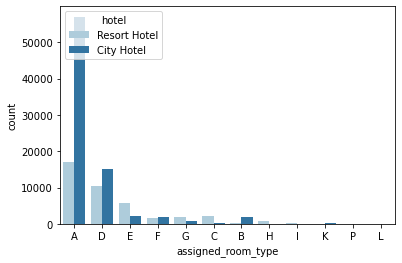

In [17]:
sns.countplot(palette='Paired' ,hue= 'hotel', x='assigned_room_type', data=data,
              order = data['assigned_room_type'].value_counts().index)

Now looking further into cancellation and the relation between a reservation being canceled and other features

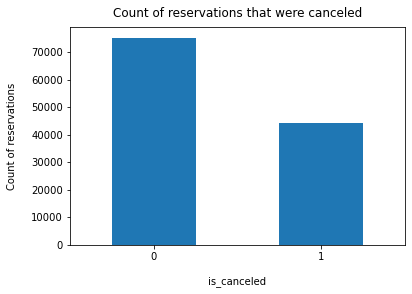

In [18]:
data['is_canceled'].value_counts().plot.bar(rot=0)
plt.xlabel("is_canceled", labelpad=14)
plt.ylabel("Count of reservations", labelpad=14)
plt.title("Count of reservations that were canceled", y=1.02);

looking at the relation between the a reservation being cancelled and the guest being a repeated guest

<function matplotlib.pyplot.show(close=None, block=None)>

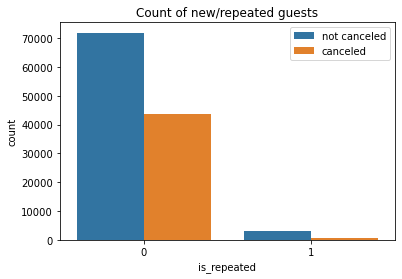

In [19]:
sns.countplot(x = data["is_repeated_guest"], hue = data['is_canceled'])
plt.title("Count of new/repeated guests")
plt.xlabel("is_repeated")
plt.legend(["not canceled", "canceled"])
plt.show

although it might not be clear due to scarcity of data, if the guest is a repeated guest 
it is more likely for the guest not to cancel

looking at the relation between the a reservation being cancelled and the guest having special requests

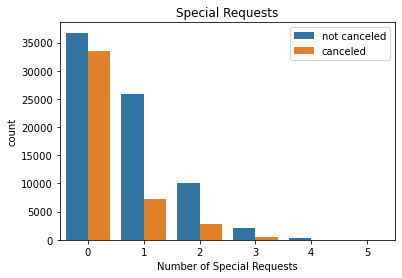

In [20]:
# plot special requests according to cancellations
# plt.figure(figsize=(10,5))
sns.countplot(x=data["total_of_special_requests"], hue=data["is_canceled"])
plt.title("Special Requests")
plt.xlabel("Number of Special Requests")
plt.legend(["not canceled", "canceled"])
plt.show()

the more the guest have special requests the less likely for the them to cancel

looking at the relation between the a reservation being cancelled and the guest requesting parking spaces

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64


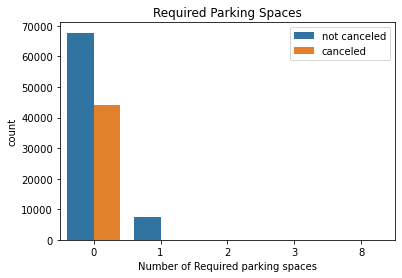

In [21]:
print(data["required_car_parking_spaces"].value_counts().sort_index())
# plt.figure(figsize=(10,5))
sns.countplot(x=data["required_car_parking_spaces"], hue=data["is_canceled"])
plt.title("Required Parking Spaces")
plt.xlabel("Number of Required parking spaces")
plt.legend(["not canceled", "canceled"])
plt.show()

you could look at it the same as special requets, the more they ask for parking the less likely they would cancel

same goes for booking changes

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64


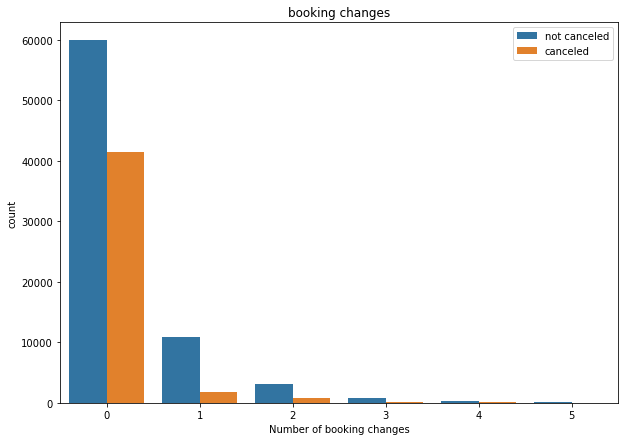

In [22]:
print(data["booking_changes"].value_counts().sort_index())
plt.figure(figsize=(10,7))
d2 = data[data["booking_changes"]<6]
sns.countplot(x=d2["booking_changes"], hue=data["is_canceled"])
plt.title("booking changes")
plt.xlabel("Number of booking changes")
plt.legend(["not canceled", "canceled"])
plt.show()

looking at if the guest had any previous cancellations

0     112906
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64


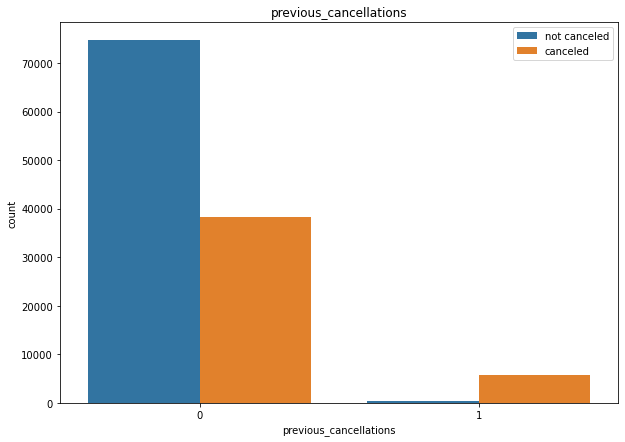

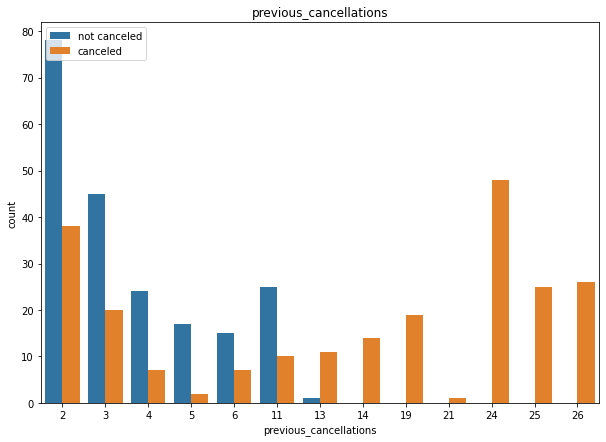

In [23]:
print(data["previous_cancellations"].value_counts().sort_index())
plt.figure(figsize=(10,7))
d2 = data[data["previous_cancellations"]<2]
sns.countplot(x=d2["previous_cancellations"], hue=data["is_canceled"])
plt.title("previous_cancellations")
# plt.xlabel("Number o")
plt.legend(["not canceled", "canceled"])
plt.show()
plt.figure(figsize=(10,7))
d2 = data[data["previous_cancellations"]>1]
sns.countplot(x=d2["previous_cancellations"], hue=data["is_canceled"])
plt.title("previous_cancellations")
# plt.xlabel("Number o")
plt.legend(["not canceled", "canceled"])
plt.show()

we divided this part into two graphs to be more visual and to show you two things, first: a guest is indecisive to cancel if they had a previous cancellation, second: after a certain amount of previous cancellations it is expected that this guest won't actually go through any reservations

you can see the different effects that features have on the cancellation from the correlation table below
which confirms our visualizations
Note that most important features are those with correlations >= +-0.1
though we also used is_repeated_guest

In [76]:
correlation = data.corr()['is_canceled'].sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [28]:
###### Classification ########

In [29]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


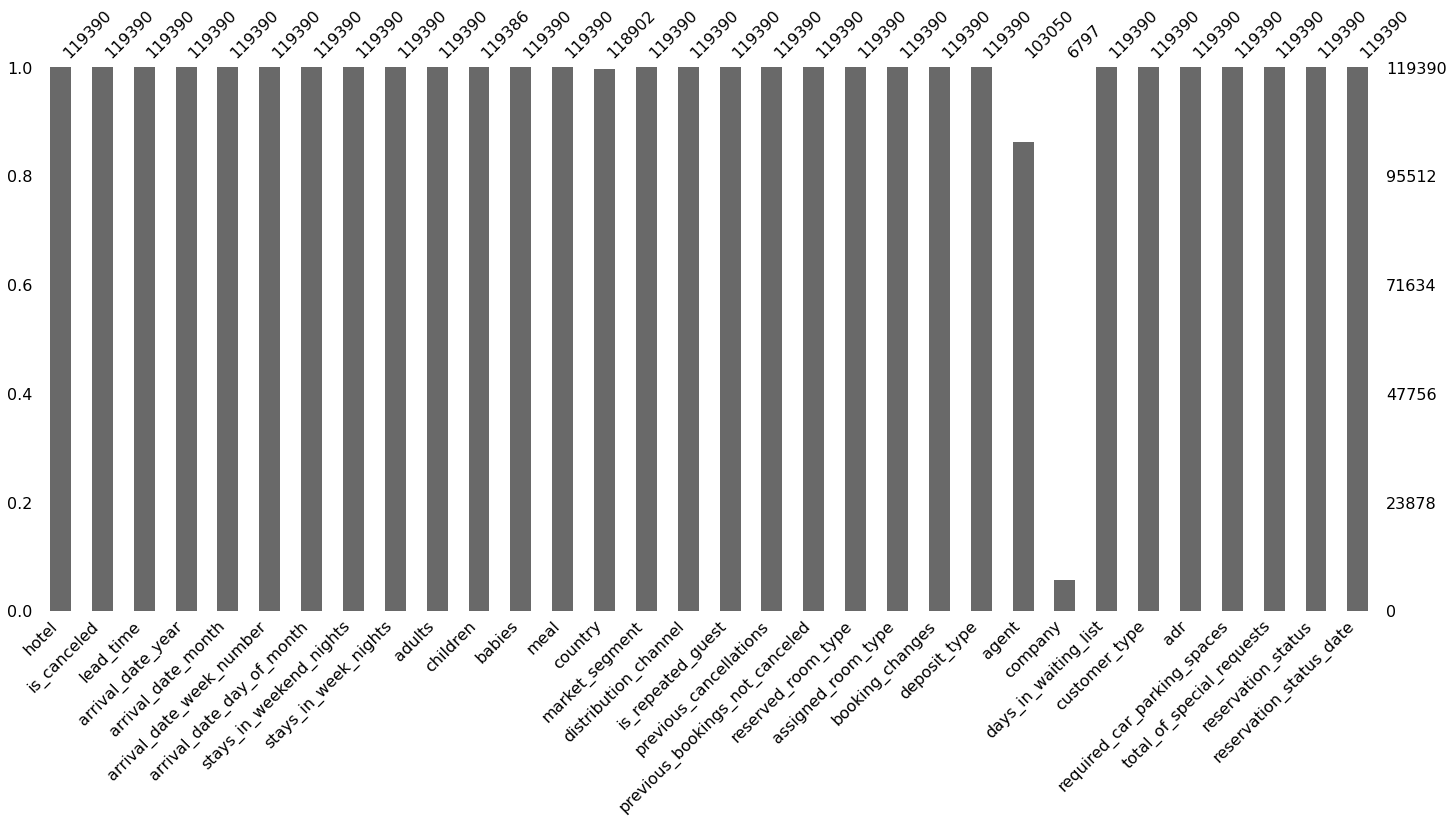

In [31]:
msno.bar(df)
plt.show()

In [32]:
df.fillna(0, inplace = True)

In [33]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.0
is_canceled,0,0.0
lead_time,0,0.0
arrival_date_year,0,0.0
arrival_date_month,0,0.0
arrival_date_week_number,0,0.0
arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,0,0.0
stays_in_week_nights,0,0.0
adults,0,0.0


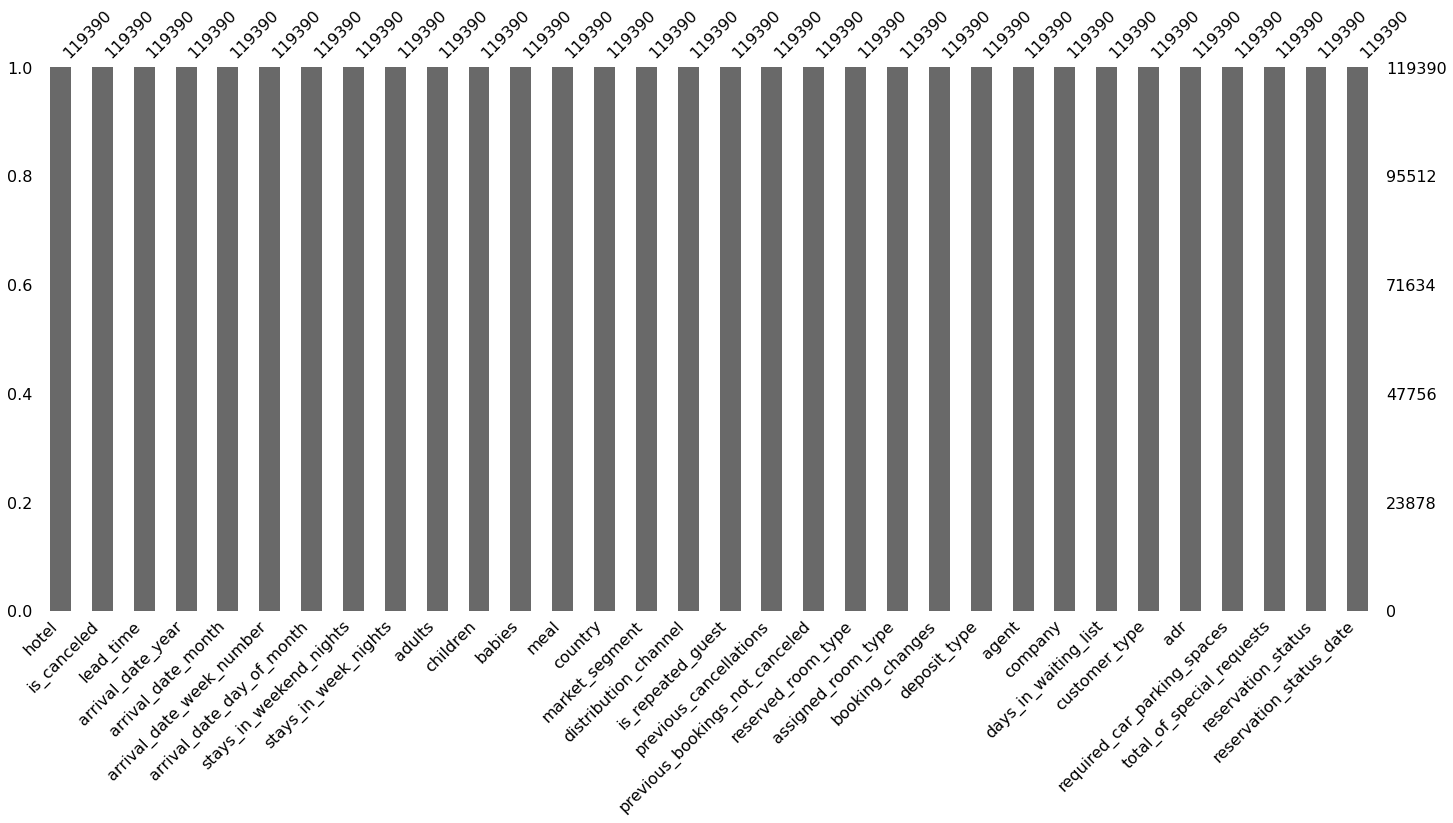

In [34]:
msno.bar(df)
plt.show()

In [35]:
#### REMOVE ROWS WITH 0 GUESTS
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [41]:
correlation = df.corr()['is_canceled'].sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
previous_cancellations            0.110139
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
babies                           -0.032569
agent                            -0.046770
previous_bookings_not_canceled   -0.057365
company                          -0.083594
is_repeated_guest                -0.083745
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [42]:
#### NUMERICAL FEATURES ####

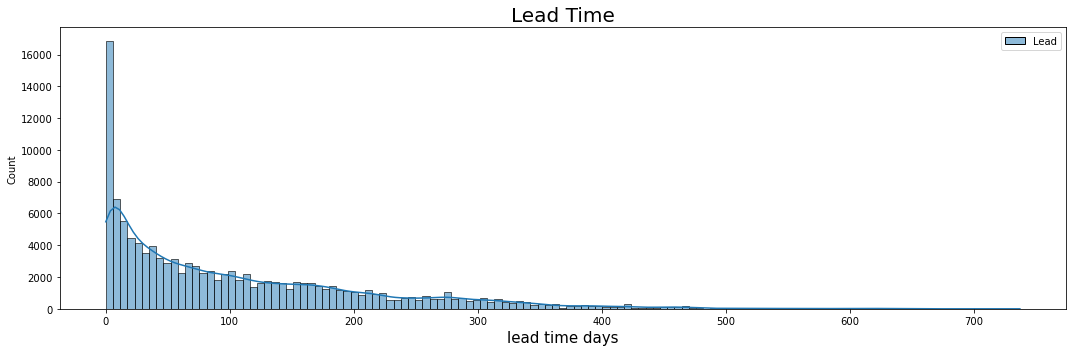

,0,1
0 up till 99 days,72.277131,27.722869
100 up till 364 days,50.106826,49.893174
365 up till inf. days,32.036115,67.963885


In [43]:
# Consider features above -/+0.1 correlation
# 1. Lead Time
### VISUALIZING LEAD TIME HISTOGRAM
plt.figure(figsize=(15,5))
lead_time = df['lead_time']
lead_time = pd.DataFrame(sorted(lead_time, reverse = True), columns = ['Lead'])
sns.histplot(lead_time, kde=True)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.tight_layout()
plt.show()

##### PERCENTAGE OF CANCELLATIONS AS LEAD TIME INCREASES
lead_time1 = df[df["lead_time"] < 100]
lead_time2= df[(df["lead_time"] >= 100) & (df["lead_time"] < 365)]
lead_time3 = df[df["lead_time"] >= 365]

lead_cancel1 = (lead_time1["is_canceled"].value_counts()/len(lead_time1.index))*100
lead_cancel2 = (lead_time2["is_canceled"].value_counts()/len(lead_time2.index))*100
lead_cancel3 = (lead_time3["is_canceled"].value_counts()/len(lead_time3.index))*100

total_lead_cancel = pd.DataFrame(data=[lead_cancel1,lead_cancel2,lead_cancel3],
             index=["0 up till 99 days", "100 up till 364 days", "365 up till inf. days"])
total_lead_cancel



In [44]:
### OBSERVATION: CANCELLATION PERCENTAGE INCREASES AS LEAD TIME INCREASES!

In [45]:
# 2. Previous Cancellations
### PERCENTAGE OF CANCELLATIONS AS PREVIOUS CANCELLATIONS INCREASE
no_prev_cancellation = df[df['previous_cancellations']==0]['is_canceled'].value_counts()/len(df[df['previous_cancellations']==0]['is_canceled'].index)
print("Cancellation rate with no previous cancellations: ", no_prev_cancellation[1]*100, "%")

one_prev_cancellation = df[df['previous_cancellations']==1]['is_canceled'].value_counts()/len(df[df['previous_cancellations']==1]['is_canceled'].index)
print("Cancellation rate with one previous cancellation: ", one_prev_cancellation[1]*100, "%")

more_than_ten_prev_cancellations = df[df['previous_cancellations']>10]['is_canceled'].value_counts()/len(df[df['previous_cancellations']>10]['is_canceled'].index)
print("Cancellation rate with more than 10 previous cancellations: ", more_than_ten_prev_cancellations[1]*100, "%")

more_than_eleven_prev_cancellations = df[df['previous_cancellations']>11]['is_canceled'].value_counts()/len(df[df['previous_cancellations']>11]['is_canceled'].index)
print("Cancellation rate with more than 11 previous cancellations: ", more_than_eleven_prev_cancellations[1]*100, "%")

Cancellation rate with no previous cancellations:  33.938313329962476 %
Cancellation rate with one previous cancellation:  94.44444444444444 %
Cancellation rate with more than 10 previous cancellations:  85.55555555555556 %
Cancellation rate with more than 11 previous cancellations:  99.3103448275862 %


In [46]:
### OBSERVATION: CANCELLATION PERCENTAGE INCREASES AS PREVIOUS CANCELLATIONS INCREASE!

In [47]:
# 3. Special Requests
### PERCENTAGE OF CANCELLATIONS AS SPECIAL REQUESTS INCREASE
no_special_requests = df[df['total_of_special_requests']==0]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==0]['is_canceled'].index)
print("Cancellation rate with no special requests: ", no_special_requests[1]*100, "%")

one_special_request = df[df['total_of_special_requests']==1]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==1]['is_canceled'].index)
print("Cancellation rate with one special request: ", one_special_request[1]*100, "%")

two_special_requests = df[df['total_of_special_requests']==2]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==2]['is_canceled'].index)
print("Cancellation rate with two special requests: ", two_special_requests[1]*100, "%")

three_special_requests = df[df['total_of_special_requests']==3]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==3]['is_canceled'].index)
print("Cancellation rate with three special requests: ", three_special_requests[1]*100, "%")

four_special_requests = df[df['total_of_special_requests']==4]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==4]['is_canceled'].index)
print("Cancellation rate with four special requests: ", four_special_requests[1]*100, "%")

five_special_requests = df[df['total_of_special_requests']==5]['is_canceled'].value_counts()/len(df[df['total_of_special_requests']==5]['is_canceled'].index)
print("Cancellation rate with five special requests: ", five_special_requests[1]*100, "%")

Cancellation rate with no special requests:  47.7685503055512 %
Cancellation rate with one special request:  22.047433927010818 %
Cancellation rate with two special requests:  22.127856701667696 %
Cancellation rate with three special requests:  17.84282277465918 %
Cancellation rate with four special requests:  10.588235294117647 %
Cancellation rate with five special requests:  5.0 %


In [48]:
### OBSERVATION: CANCELLATION PERCENTAGE DECREASES AS NUMBER OF SPECIAL REQUESTS INCREASES!

In [49]:
# 4. Required Car Parking Spaces
### PERCENTAGE OF CANCELLATIONS AS REQUIRED CAR PARKING SPACES INCREASE
print("Required car parking spaces:")
print(df["required_car_parking_spaces"].value_counts().sort_index())
required_car_parking_spaces0 = df[df['required_car_parking_spaces']==0]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==0]['is_canceled'].index)
required_car_parking_spaces1 = df[df['required_car_parking_spaces']==1]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==1]['is_canceled'].index)
required_car_parking_spaces2 = df[df['required_car_parking_spaces']==2]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==2]['is_canceled'].index)
required_car_parking_spaces3 = df[df['required_car_parking_spaces']==3]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==3]['is_canceled'].index)
required_car_parking_spaces8 = df[df['required_car_parking_spaces']==8]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']==8]['is_canceled'].index)
print("Cancellation rate to 0 required car parking spaces: ")
print(required_car_parking_spaces0)
print("Cancellation rate to 1 required car parking spaces: ")
print(required_car_parking_spaces1)
print("Cancellation rate to 2 required car parking spaces: ")
print(required_car_parking_spaces2)
print("Cancellation rate to 3 required car parking spaces: ")
print(required_car_parking_spaces3)
print("Cancellation rate to 8 required car parking spaces: ")
print(required_car_parking_spaces8)

Required car parking spaces:
0    111801
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64
Cancellation rate to 0 required car parking spaces: 
0    0.604664
1    0.395336
Name: is_canceled, dtype: float64
Cancellation rate to 1 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64
Cancellation rate to 2 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64
Cancellation rate to 3 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64
Cancellation rate to 8 required car parking spaces: 
0    1.0
Name: is_canceled, dtype: float64


In [50]:
### OBSERVATION: From the results, it's quite obvious that it's risky to predict that if required car parking spaces are more than 0, the booking will be canceled.

In [51]:
# 5. Booking Changes
### PERCENTAGE OF CANCELLATIONS AS BOOKING CHANGES INCREASE
for i in range(0, 11):
    x = df[df['booking_changes']==i]['is_canceled'].value_counts()/len(df[df['booking_changes']==i]['is_canceled'].index)
    print(i, x[1] * 100)
#     print("Cancellation rate with no special requests: ", no_booking_changes[i]*100, "%")

# one_booking_change = df[df['booking_changes']==0]['is_canceled'].value_counts()/len(df[df['booking_changes']==0]['is_canceled'].index)
# print("Cancellation rate with no special requests: ", one_booking_change[1]*100, "%")

0 40.8655365892208
1 14.242854887099321
2 20.264550264550266
3 15.75492341356674
4 18.256130790190735
5 17.391304347826086
6 29.508196721311474
7 10.344827586206897
8 28.57142857142857
9 12.5
10 16.666666666666664


In [52]:
### Observation: Booking changes change over time (not a good variable)

In [53]:
#### CATEGORICAL FEATURES ####

In [54]:
# Country seems to be useless since there are many countries with insignficant count values
df["country"].value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
NAM        1
BFA        1
MRT        1
UMI        1
HND        1
Name: country, Length: 178, dtype: int64

In [55]:
### REMOVING USELESS FEATURES ###

### NUMERICAL
# arrival_date_year: could be a problem in future years (values unseen before)
# arrival_date_day_of_month: there's already arrival date week of month that generalizes it
# booking_changes: changes over time -> data leakage
# days_in_waiting_list: changes over time
# agent: ID (numerical value with no meaning)
# company: ID (numerical value with no meaning)

### CATEGORICAL
#country: many countries with low count
#assigned_room_type: equivalent to reserved_room_type
#reservation_status: data leakage, equivalent to is_canceled
#arrival_date_month: redundant in reservation status

In [56]:

# num_features = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'previous_cancellations']
# df = df[interesting_features]
# df.head()
# df.drop(['arrival_date_week_number', 'arrival_date_day_of_month', 'children', 'stays_in_weekend_nights'], axis = 1, inplace = True)

In [57]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_cols].astype('category')
cat_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [58]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month','country','assigned_room_type', 'reservation_status'] , axis = 1, inplace = True)

In [59]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [60]:
cat_df['hotel'] = cat_df['hotel'].cat.codes
cat_df['meal'] = cat_df['meal'].cat.codes
cat_df['market_segment'] = cat_df['market_segment'].cat.codes
cat_df['distribution_channel'] = cat_df['distribution_channel'].cat.codes
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].cat.codes
cat_df['deposit_type'] = cat_df['deposit_type'].cat.codes
cat_df['customer_type'] = cat_df['customer_type'].cat.codes
cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [61]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,0,7,1
1,1,0,3,1,2,0,2,0,7,1
2,1,0,3,1,0,0,2,0,7,2
3,1,0,2,0,0,0,2,0,7,2
4,1,0,6,3,0,0,2,0,7,3
...,...,...,...,...,...,...,...,...,...,...
119385,0,0,5,3,0,0,2,3,9,6
119386,0,0,6,3,4,0,2,3,9,7
119387,0,0,6,3,3,0,2,3,9,7
119388,0,0,6,3,0,0,2,3,9,7


In [62]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop(['is_canceled', 'arrival_date_year', 'arrival_date_day_of_month', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'required_car_parking_spaces'], axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests
0,342,27,0,0,2,0.0,0,0,0,0,0.00,0
1,737,27,0,0,2,0.0,0,0,0,0,0.00,0
2,7,27,0,1,1,0.0,0,0,0,0,75.00,0
3,13,27,0,1,1,0.0,0,0,0,0,75.00,0
4,14,27,0,2,2,0.0,0,0,0,0,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,2,5,2,0.0,0,0,0,0,96.14,0
119386,102,35,2,5,3,0.0,0,0,0,0,225.43,2
119387,34,35,2,5,2,0.0,0,0,0,0,157.71,4
119388,109,35,2,5,2,0.0,0,0,0,0,104.40,0


In [63]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
adr                                2543.589039
total_of_special_requests             0.628652
dtype: float64

In [64]:
### NORMALIZING/STANDARDIZING VARIABLES WITH HIGH VARIANCE
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

D:\Dev\anaconda3\envs\bigdataproj\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
adr                               0.515480
total_of_special_requests         0.628652
dtype: float64

In [66]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [67]:
X = pd.concat([cat_df, num_df], axis = 1)

In [68]:
y = df['is_canceled']
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119210, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [70]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests
106187,0,0,6,3,0,0,2,3,2,23,...,2,2,2,0.0,0,0,0,0,4.454347,1
114977,0,0,6,3,3,0,2,3,6,30,...,2,3,2,0.0,0,0,0,0,4.844187,0
12421,1,0,6,3,2,0,2,3,2,6,...,2,8,2,1.0,1,0,0,0,4.678049,0
92821,0,0,6,3,0,0,2,2,7,13,...,2,2,2,0.0,0,0,0,0,4.735760,1
16420,1,0,6,3,4,0,2,0,8,29,...,2,5,2,0.0,0,0,0,0,5.375278,0


In [71]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,total_of_special_requests
102397,0,3,6,3,0,0,2,2,11,27,...,0,4,2,0.0,0,0,0,0,4.328098,1
114062,0,0,6,3,0,0,2,3,6,16,...,0,3,1,0.0,0,0,0,0,4.875197,1
3816,1,0,6,3,3,0,2,0,10,28,...,2,10,2,0.0,0,0,0,0,3.747148,0
77286,0,3,6,3,0,0,2,0,9,16,...,2,3,2,0.0,0,1,1,0,4.897840,1
3253,1,0,6,3,0,0,2,0,11,29,...,0,3,1,0.0,0,0,0,0,3.610918,1


In [72]:
y_train.head()

106187    0
114977    0
12421     1
92821     0
16420     0
Name: is_canceled, dtype: int64

In [73]:
y_test.head()

102397    0
114062    0
3816      1
77286     1
3253      0
Name: is_canceled, dtype: int64

In [74]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
                         
acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print("Accuracy: ", acc)
print("Confusion Matrix : \n", cm)

Accuracy:  0.8691944188127394
Confusion Matrix : 
 [[21346  1214]
 [ 3464  9739]]


In [77]:
model = Sequential()
model.add(Dense(100, input_dim=22, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
y = to_categorical(df['is_canceled'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 200)

Epoch 1/200
2608/2608 [==============================] - 3s 917us/step - loss: 0.4829 - accuracy: 0.7789 - val_loss: 0.3754 - val_accuracy: 0.8432
Epoch 2/200
2608/2608 [==============================] - 2s 867us/step - loss: 0.3455 - accuracy: 0.8591 - val_loss: 0.2890 - val_accuracy: 0.8848
Epoch 3/200
2608/2608 [==============================] - 2s 856us/step - loss: 0.2830 - accuracy: 0.8904 - val_loss: 0.2679 - val_accuracy: 0.8918
Epoch 4/200
2608/2608 [==============================] - 2s 846us/step - loss: 0.2477 - accuracy: 0.9061 - val_loss: 0.2309 - val_accuracy: 0.9190
Epoch 5/200
2608/2608 [==============================] - 2s 834us/step - loss: 0.2301 - accuracy: 0.9156 - val_loss: 0.2151 - val_accuracy: 0.9251
Epoch 6/200
2608/2608 [==============================] - 2s 824us/step - loss: 0.2135 - accuracy: 0.9229 - val_loss: 0.2113 - val_accuracy: 0.9222
Epoch 7/200
2608/2608 [==============================] - 2s 856us/step - loss: 0.2095 - accuracy: 0.9237 - val_loss: 0

2608/2608 [==============================] - 3s 1ms/step - loss: 0.1054 - accuracy: 0.9639 - val_loss: 0.1306 - val_accuracy: 0.9633
Epoch 57/200
2608/2608 [==============================] - 2s 945us/step - loss: 0.1019 - accuracy: 0.9647 - val_loss: 0.1373 - val_accuracy: 0.9580
Epoch 58/200
2608/2608 [==============================] - 2s 915us/step - loss: 0.1048 - accuracy: 0.9627 - val_loss: 0.1412 - val_accuracy: 0.9582
Epoch 59/200
2608/2608 [==============================] - 2s 944us/step - loss: 0.1061 - accuracy: 0.9630 - val_loss: 0.1329 - val_accuracy: 0.9626
Epoch 60/200
2608/2608 [==============================] - 3s 1ms/step - loss: 0.1062 - accuracy: 0.9633 - val_loss: 0.1665 - val_accuracy: 0.9513
Epoch 61/200
2608/2608 [==============================] - 2s 955us/step - loss: 0.0957 - accuracy: 0.9670 - val_loss: 0.1377 - val_accuracy: 0.9582
Epoch 62/200
2608/2608 [==============================] - 3s 963us/step - loss: 0.1029 - accuracy: 0.9645 - val_loss: 0.1737 - va

2608/2608 [==============================] - 2s 892us/step - loss: 0.0904 - accuracy: 0.9681 - val_loss: 0.1618 - val_accuracy: 0.9607
Epoch 112/200
2608/2608 [==============================] - 3s 1ms/step - loss: 0.0820 - accuracy: 0.9709 - val_loss: 0.1853 - val_accuracy: 0.9546
Epoch 113/200
2608/2608 [==============================] - 2s 919us/step - loss: 0.0809 - accuracy: 0.9719 - val_loss: 0.2005 - val_accuracy: 0.9340
Epoch 114/200
2608/2608 [==============================] - 3s 1ms/step - loss: 0.0817 - accuracy: 0.9703 - val_loss: 0.1513 - val_accuracy: 0.9628
Epoch 115/200
2608/2608 [==============================] - 2s 940us/step - loss: 0.0799 - accuracy: 0.9717 - val_loss: 0.1517 - val_accuracy: 0.9610
Epoch 116/200
2608/2608 [==============================] - 2s 877us/step - loss: 0.0770 - accuracy: 0.9730 - val_loss: 0.1495 - val_accuracy: 0.9589
Epoch 117/200
2608/2608 [==============================] - 3s 1ms/step - loss: 0.0788 - accuracy: 0.9730 - val_loss: 0.1539 

2608/2608 [==============================] - 2s 895us/step - loss: 0.0663 - accuracy: 0.9758 - val_loss: 0.1639 - val_accuracy: 0.9612
Epoch 167/200
2608/2608 [==============================] - 2s 851us/step - loss: 0.0659 - accuracy: 0.9767 - val_loss: 0.1632 - val_accuracy: 0.9622
Epoch 168/200
2608/2608 [==============================] - 2s 885us/step - loss: 0.0671 - accuracy: 0.9765 - val_loss: 0.1685 - val_accuracy: 0.9643
Epoch 169/200
2608/2608 [==============================] - 2s 851us/step - loss: 0.0628 - accuracy: 0.9779 - val_loss: 0.1607 - val_accuracy: 0.9639
Epoch 170/200
2608/2608 [==============================] - 2s 900us/step - loss: 0.0672 - accuracy: 0.9763 - val_loss: 0.2235 - val_accuracy: 0.9283
Epoch 171/200
2608/2608 [==============================] - 3s 1ms/step - loss: 0.0642 - accuracy: 0.9771 - val_loss: 0.1940 - val_accuracy: 0.9571
Epoch 172/200
2608/2608 [==============================] - 2s 921us/step - loss: 0.0656 - accuracy: 0.9759 - val_loss: 0.1

In [78]:
####### Time Series Analysis #######

In [79]:
df = pd.read_csv("hotel_bookings.csv")

From the first look, we can see that column Company has a lot of NAN values.

In [80]:
percNAN = (df['company'].isna().sum()/df.shape[0])*100
percNAN

94.30689337465449

Since 94% of the column is NAN, we can remove it.

In [81]:
df.drop('company', inplace=True, axis=1)

Let's combine the arrival year, month and day into one column and make it the dataframe index.

In [82]:
df.rename(columns = {'arrival_date_year' : 'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'},inplace = True)
df['arrival_date'] = pd.to_datetime(df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str), infer_datetime_format=True)
df.head()

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [83]:
df.set_index(df['arrival_date'], inplace=True)
df.head()

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2015-07-01,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
2015-07-01,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
2015-07-01,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


Let's explore column adr. 

In [84]:
df.nlargest(5,'adr', 'first')

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2016-03-25,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19,2016-03-25
2017-05-09,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09
2015-07-15,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,NaN,0,Transient,508.0,1,0,Check-Out,2015-07-16,2015-07-15
2016-12-31,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,0,Transient-Party,451.5,0,4,Check-Out,2017-01-02,2016-12-31
2017-08-01,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.0,0,Transient,450.0,0,0,Canceled,2016-07-22,2017-08-01


We can see that there is an outlier of 5400. We can remove it.

In [85]:
df = df[df['adr'] != 5400]
df.nlargest(5,'adr', 'first')

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2017-05-09,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09
2015-07-15,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,NaN,0,Transient,508.0,1,0,Check-Out,2015-07-16,2015-07-15
2016-12-31,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,0,Transient-Party,451.5,0,4,Check-Out,2017-01-02,2016-12-31
2017-08-01,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.0,0,Transient,450.0,0,0,Canceled,2016-07-22,2017-08-01
2017-08-13,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,No Deposit,250.0,0,Transient,437.0,0,0,Canceled,2017-08-03,2017-08-13


Now we can plot ADR vs time.

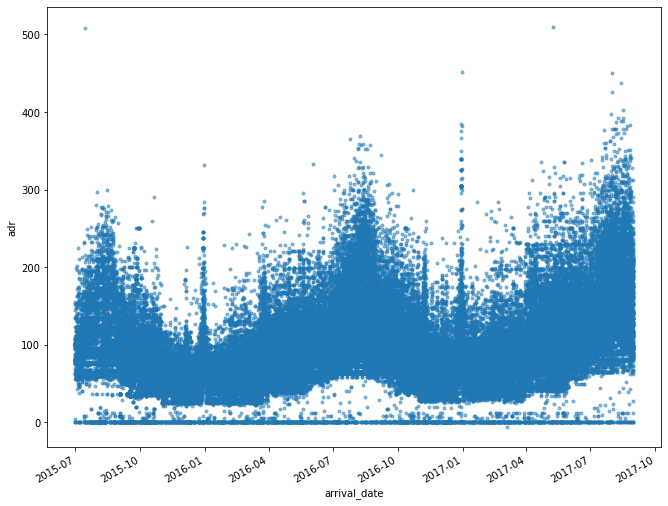

In [86]:
ax = df['adr'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True);
ax[0].set_ylabel("adr");

There is an interesting pattern in the summer here. Let's zoom in on it.

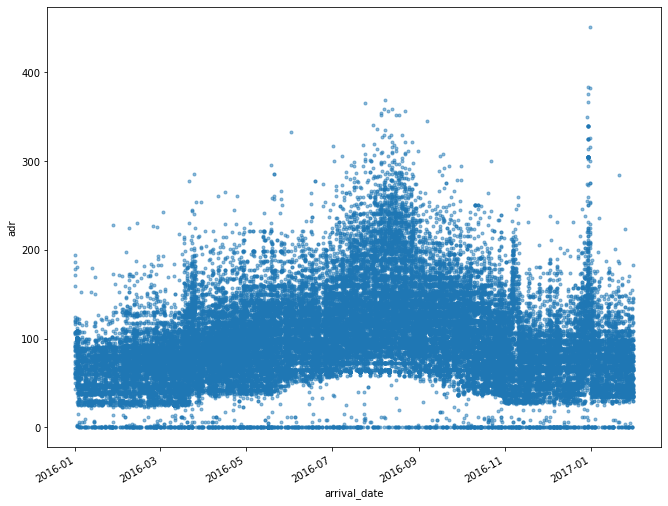

In [87]:
ax = df.loc['2016-01':'2017-01', 'adr'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True);
ax[0].set_ylabel("adr");

It can be inferred that the Average Daily Rate increases in the summer (months 7 to 8) which makes sense since the average daily rate is the total number of transactions over number of staying nights and both generally increase in the summer.

However, there are too many samples to have a clear observation. Let's resample our data such that the weekly observations are plotted.

In [88]:
df_weekly_mean = df['adr'].resample('W').mean()
df_weekly_mean.head(3)

arrival_date
2015-07-05     90.397743
2015-07-12     94.156404
2015-07-19    101.486901
Freq: W-SUN, Name: adr, dtype: float64

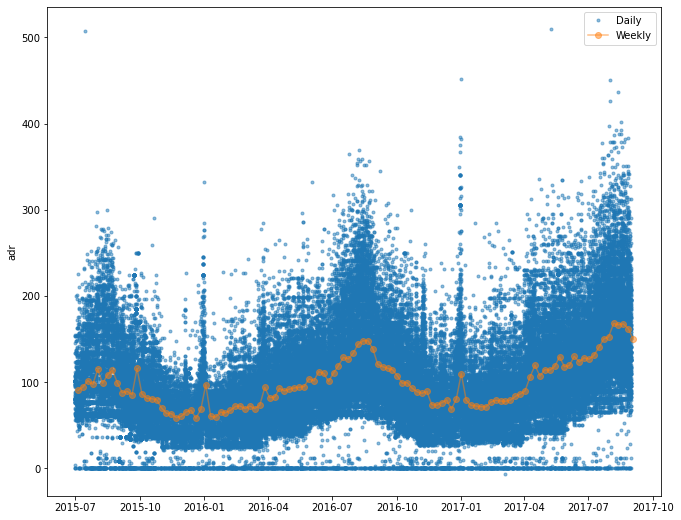

In [89]:
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df['adr'],marker='.', alpha=0.5, linestyle='None', label = 'Daily');
ax.plot(df_weekly_mean,marker='o', alpha=0.5, linestyle='-', label = 'Weekly');
ax.legend();
ax.set_ylabel("adr");

Resampling outputs a lower frequency data. What if we can achieve similar results without decreasing the frequency? This is where rolling is needed. Rolling overlaps and "rolls" the data so that the output is of the same frequency as the original. We will use 7-day rolling. We do so by first getting the mean for repeated days by resampling to 1D and rolling the output.

In [90]:
df_7d = df['adr'].resample("1d").mean().rolling(window=7, min_periods=1).mean()
df_7d.head(10)

arrival_date
2015-07-01    92.828934
2015-07-02    87.517209
2015-07-03    90.739151
2015-07-04    89.449932
2015-07-05    91.560474
2015-07-06    91.376906
2015-07-07    91.548697
2015-07-08    89.714791
2015-07-09    89.492294
2015-07-10    91.608639
Freq: D, Name: adr, dtype: float64

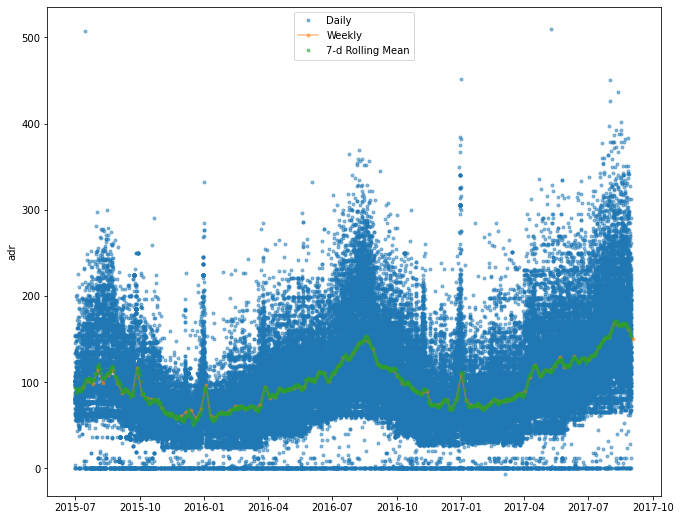

In [91]:
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df['adr'],marker='.', alpha=0.5, linestyle='None', label = 'Daily');
ax.plot(df_weekly_mean,marker='.', alpha=0.5, linestyle='-', label = 'Weekly');
ax.plot(df_7d,marker='.', alpha=0.5, linestyle='None', label = '7-d Rolling Mean');
ax.legend();
ax.set_ylabel("adr");

As you can see, the results are identical.
Now, we analyze the trend in the data.

In [92]:
df_365 = df['adr'].resample("1d").mean().rolling(window=365, center=True, min_periods=360).mean()

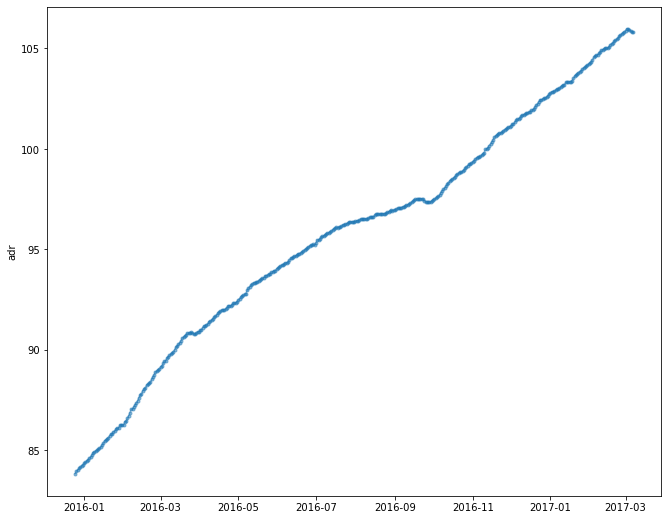

In [93]:
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df_365,marker='.', alpha=0.5, linestyle='-', label = 'Trend');
ax.set_ylabel("adr");

Working with the resampled data, we analyze the seasonality. 

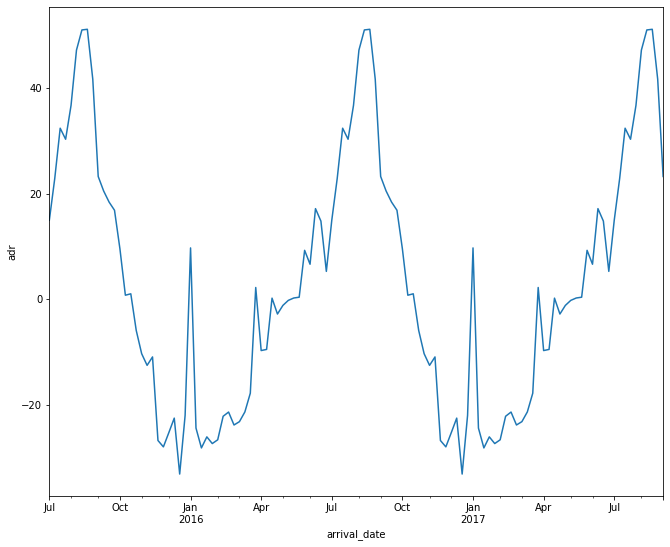

In [94]:
sd = seasonal_decompose(df_weekly_mean, model='additive').seasonal.plot(figsize=(11,9))
sd.set_ylabel("adr");

Looking at the result, we can further prove that there is a seasonality component in our data, which was intuitive from the original data.
This, the variance in the data and the trend make the time series unstationary. Let's try to make it stationary using SARIMA.

First, we split the dataset into training and test sets.

Then we take log10 of the data to remove the variance in the data.

In [95]:
values = df_weekly_mean.values
size = 90
train, test = values[0:size], values[size:len(values)]
train_log = np.log10(train)
test_log = np.log10(test)

Analyzing the partial autocorrelation and autocorrelation of the data gives us a starting point for the q and p parameters.

From the graphs, we can deduce that p = 1 and q = 6. We will also use d = 1 for detrending.

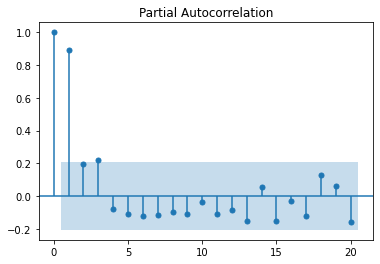

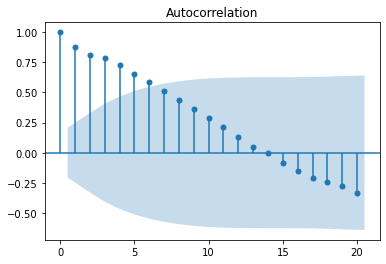

In [96]:
plot_pacf(train);
plot_acf(train);

In [97]:
original = train_log.copy().tolist()
predictions = original.copy()
for t in range(len(test_log)):
    model = sm.tsa.statespace.SARIMAX(original, order=(1,1,6))
    model_fit = model.fit(maxiter=200)
    output = model_fit.forecast()
    predictions.append(output[0])
    original.append(test_log[t])
    print('predicted=%f, expected=%f' % (output[0], test_log[t]))

predicted=1.902303, expected=1.934728
predicted=1.923405, expected=1.953339
predicted=1.941954, expected=2.024739
predicted=2.001936, expected=2.076426
predicted=2.049965, expected=2.029407
predicted=2.037279, expected=2.057713
predicted=2.073551, expected=2.055711
predicted=2.052509, expected=2.072089
predicted=2.073626, expected=2.110397
predicted=2.108948, expected=2.071048
predicted=2.072981, expected=2.075995
predicted=2.089210, expected=2.112818
predicted=2.099757, expected=2.091188
predicted=2.090076, expected=2.107008
predicted=2.112145, expected=2.102216
predicted=2.098882, expected=2.117082
predicted=2.116102, expected=2.146075
predicted=2.133555, expected=2.175807
predicted=2.161536, expected=2.183229
predicted=2.178354, expected=2.225059
predicted=2.219384, expected=2.221058
predicted=2.219270, expected=2.223938
predicted=2.235646, expected=2.209494
predicted=2.221536, expected=2.174707


After forecasting, we will draw the predicted values against the real values. As shown in the figure, they are very close.

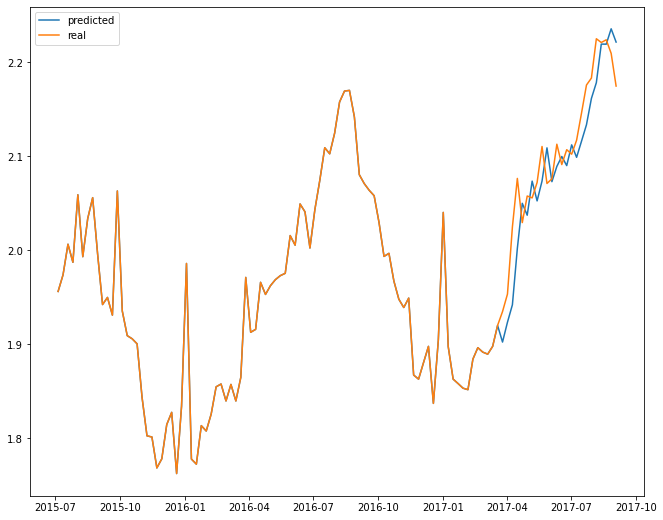

In [98]:
fig, ax = plt.subplots(figsize = (11,9))
plt.plot(df_weekly_mean.index, predictions)
plt.plot(df_weekly_mean.index, original)
ax.legend(["predicted", "real"]);

We then get the mean squared error.

In [99]:
rmse = sqrt(mean_squared_error(test_log, predictions[size:]))
print(rmse)

0.03432277160807041


The END